# IMPORTS

In [1]:
%pip install kagglehub


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import kagglehub

## SETTINGS

In [4]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

In [5]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

## DATAFRAME

In [6]:
#path= kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

In [7]:
path= "data/amz_uk_price_prediction_dataset.csv"

In [8]:
df= pd.read_csv(path)

In [9]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


---
### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

---


### Frequency

In [10]:
df.sample(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2277733,2630026,B084VNS973,"ASHATA Phono Turntable Preamp, Phono Amplifier...",4.2,10,50.17,False,0,Hi-Fi Receivers & Separates
2281266,2633690,B0BLJTS99Y,FEER 5.1 Channel 300W High Power SD USB FM Blu...,0.0,0,392.72,False,0,Hi-Fi Receivers & Separates
1336963,1475185,B09RMYQYYY,Westlane Linens 2 Premium Cotton Bath Sheet (9...,4.5,574,19.19,False,0,Bathroom Linen
1276457,1412596,B0BXL9MG1H,FBITE Inflatable Stand Up Paddle Board with Pr...,0.0,0,1904.99,False,0,Sports & Outdoors
580156,624925,B0B5XPPXPZ,Name Initial Monogram Flower Gift 11 oz Cerami...,0.0,0,6.29,False,0,Handmade Kitchen & Dining


In [11]:
# Working on Category Column

freq_table= df["category"].value_counts()
prop_table= df["category"].value_counts(normalize= True)

freq_table= freq_table.sort_values(ascending=False)
prop_table= prop_table.sort_values(ascending=False)

In [12]:
col_category_data= pd.DataFrame({
  "Frequency": freq_table, 
  "Proportion": prop_table})

In [13]:
col_category_data.sample(5)

,Frequency,Proportion
category,,
Industrial Electrical,220,0.000090
I/O Port Cards,257,0.000105
Wind Instruments,250,0.000102
Women,17772,0.007273
Golf Shoes,5967,0.002442


In [14]:
# The first por frequent (favorite) items on category table:
freq_table.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


### They are:
 
 - Sports & Outdoors                        : 836265
 - Beauty                                   :  19312
 - Handmade Clothing, Shoes & Accessories   :  19229
 - Bath & Body                              :  19092
 - Birthday Gifts                           :  18978

---

### Visualization


C:\Users\Usuario\AppData\Local\Temp\ipykernel_18436\213052794.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_category_data.index, y=col_category_data.Frequency, palette= "magma")


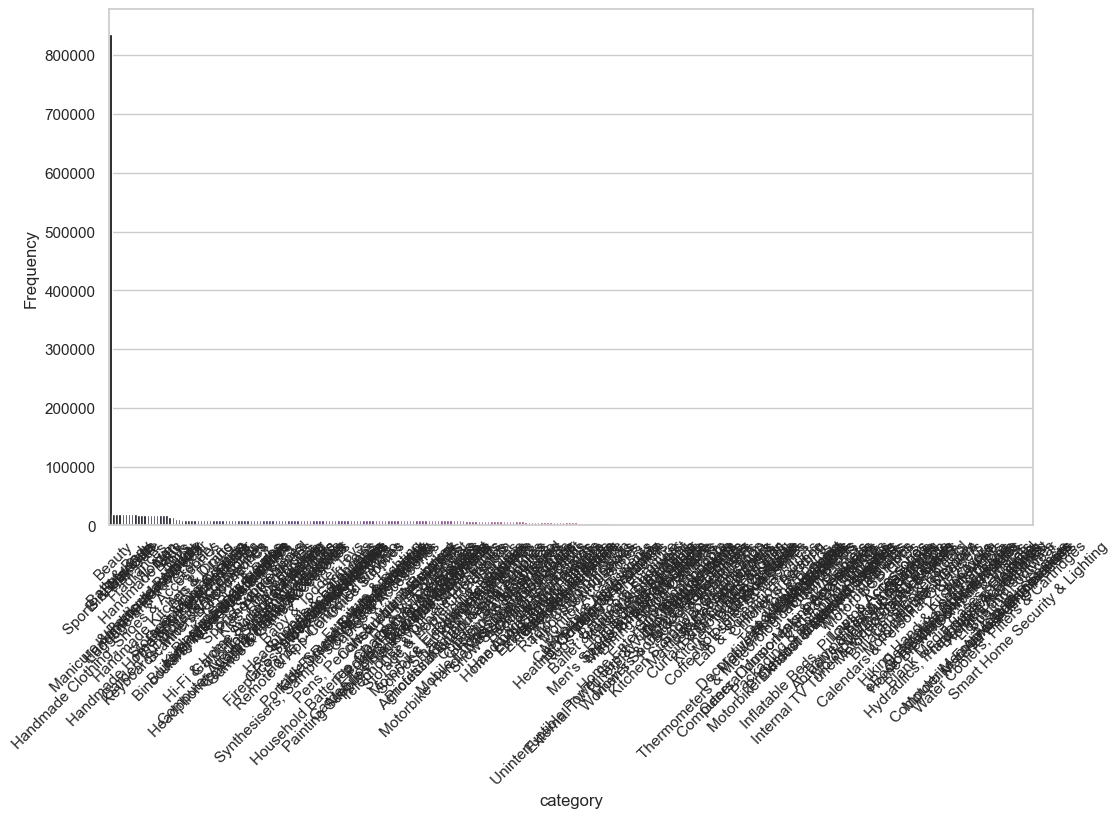

In [15]:
sns.barplot(x=col_category_data.index, y=col_category_data.Frequency, palette= "magma")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Subset

Because we have so many categories on X, and a very large number of frequency rate throught the caetogy items, we can't see nothing useful nor really useful, so we are going to make a subset to choose only top 5 items.

In [16]:
top5= col_category_data.head(5)
top5

,Frequency,Proportion
category,,
Sports & Outdoors,836265,0.342219
Beauty,19312,0.007903
"Handmade Clothing, Shoes & Accessories",19229,0.007869
Bath & Body,19092,0.007813
Birthday Gifts,18978,0.007766


C:\Users\Usuario\AppData\Local\Temp\ipykernel_18436\2018296343.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top5.index, y= top5.Frequency,palette= "magma")


<Axes: xlabel='category', ylabel='Frequency'>

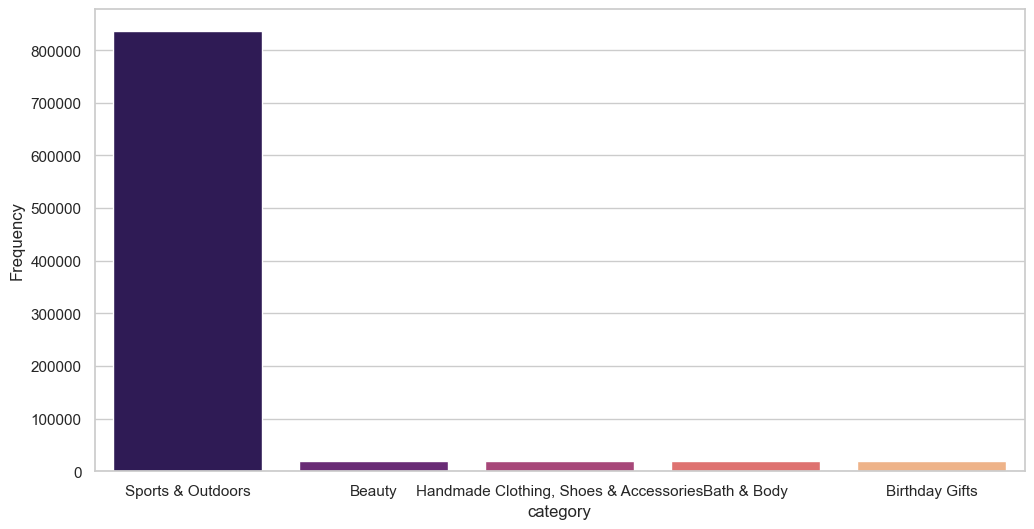

In [17]:
sns.barplot(x= top5.index, y= top5.Frequency,palette= "magma")

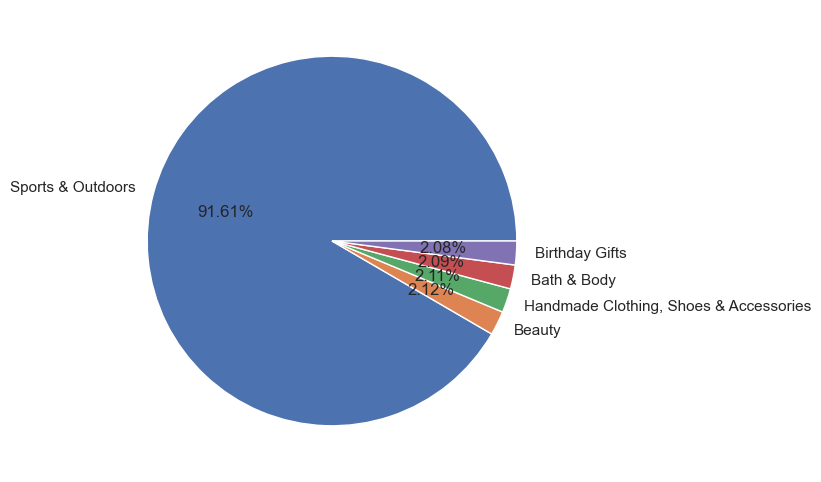

In [18]:
plt.pie(top5.Frequency, labels= top5.index, autopct= "%.2f%%")
plt.show()

Now, we can see that "Sports & Outdoors" are the most popular items.

---

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

---

In [19]:
print(f"Price mean: {df["price"].mean()}\
      \nPrice median: {df["price"].median()}\
      \nPrice mode: {df["price"].mode()[0]}")

Price mean: 89.24380943923663      
Price median: 19.09      
Price mode: 9.99


Analyzing this, we have that:

- The mean is such hight, wich suggest that either product prices are generally expensive or that a few items are extremely costly, pulling the average up.
- The median is much lower than the mean, meaning that the average is heavily influenced by high-priced outliers — most products actually cost less than 20.
- The mode says the majority of items costs 9.99.

In [20]:
print(f"Price variance: {df["price"].var()}\
      \nPrice standard deviation: {df["price"].std()}\
      \nPrice range: {df["price"].max()- df["price"].min()}\
      \nInterquantile range: {df["price"].quantile(0.75)- df["price"].quantile(0.25)}")

Price variance: 119445.48532256528      
Price standard deviation: 345.60886175352226      
Price range: 100000.0      
Interquantile range: 36.0


Analyzing this, we have that:

- Variance and Standrd deviation: both are very high, showing a huge gap between cheap and expensive products —prices are widely spread out.
- Range: indicates the difference between the most expensive and the cheapest item (a massive 100,000).
- IQR: to put it simply; while the total range is 100,000, half of the products are concentrated within just 36 monetary units. This means most items are low-priced, and a few outliers are pushing the average (mean) much higher.

In [21]:
# WE CAN DO ALL THE SAME USING .describe(), BUT WHILE THE PARTS ARE SEPARATED, WE DO IT BY SEPARATETLY
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


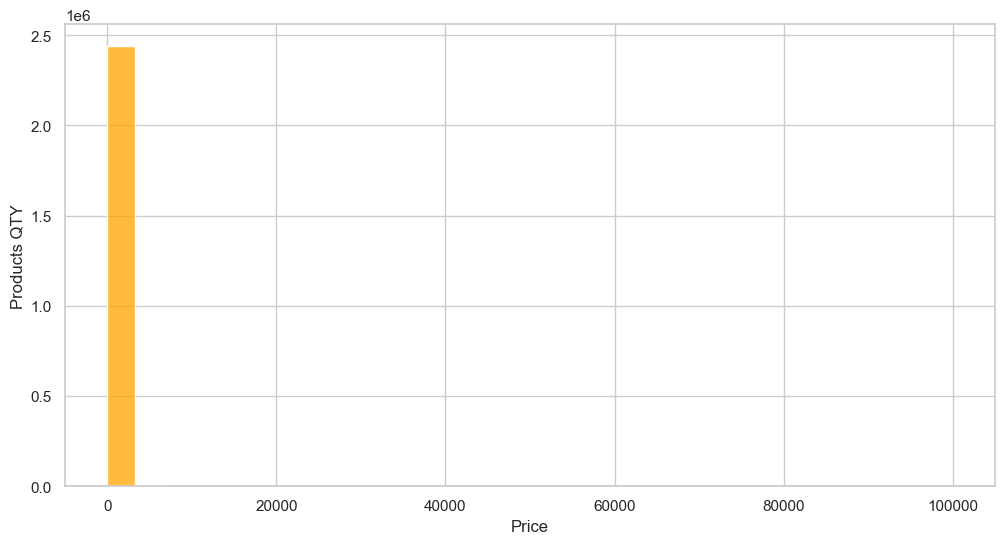

In [25]:
sns.histplot(df["price"], bins=30, color= "orange") #bins "auto" breaks the program, but values too small only shows 1 bar
plt.xlabel("Price")
plt.ylabel("Products QTY")
plt.show()

Since we only can show 1 bar bc the price difference, we need to limit the prices we want to see

<Axes: xlabel='price', ylabel='Count'>

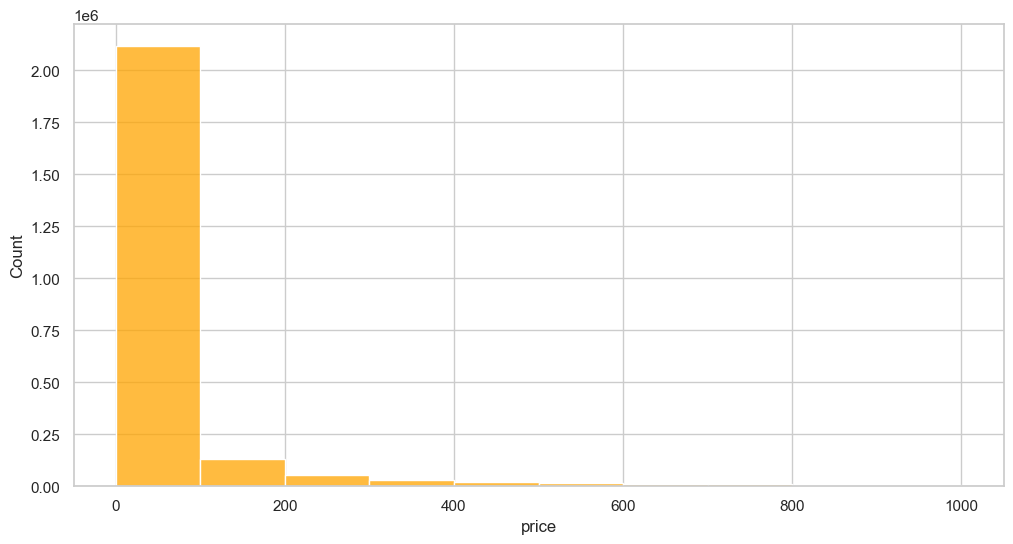

In [31]:
sns.histplot(df["price"][df["price"]< 1000], bins=10, color= "orange")

Even like that, we can see that huge bar bothering us. We're gonna use a boxplot, another plot that allow us to see dispersion and detect better these outliers messing with us.

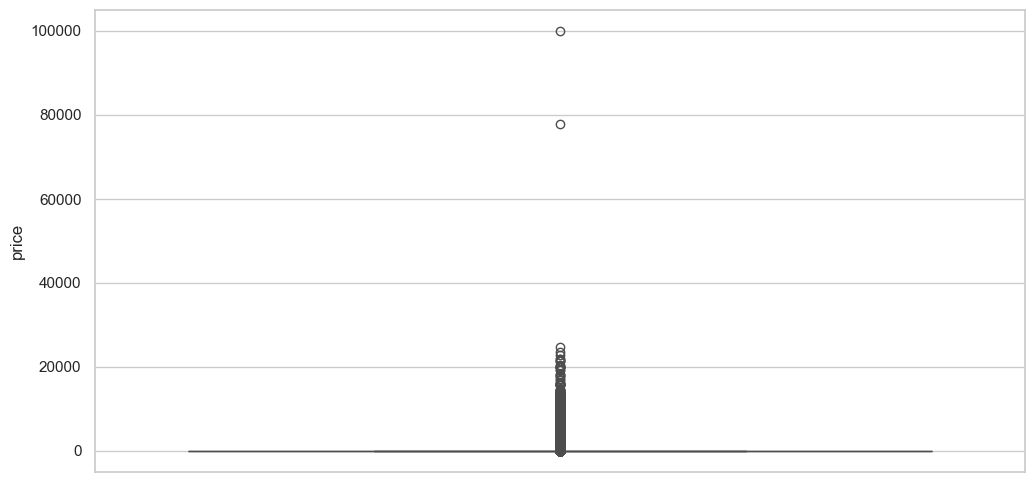

In [32]:
sns.boxplot(df["price"], color="orange")
plt.show()

We see here that:

- Majority of dots are near to zero, so a lot of procut prices are near to zero too.
- The outliers are those picky dots far away from the mean, up to 78,000 and 100,000
- The Lower whisker is that little and almost inperceptible line on 0. It's hard to see it, but it is between 0 and 20!

---

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

In [36]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [ ]:
print(f"Rating mean: {df['stars'].mean()}\
      \nRating median: {df['stars'].median()}\
      \nPrice mode: {df['stars'].mode()[0]}")

Rating mean: 2.152836472966065      
Rating median: 0.0      
Price mode: 0.0


In [42]:
df["stars"].dtype

dtype('float64')

In [ ]:
df["stars"].value_counts()

stars
0.0    0.501561
4.5    0.062029
4.6    0.056062
4.4    0.055722
5.0    0.052582
4.3    0.046064
4.7    0.038699
4.2    0.035550
4.0    0.027045
4.1    0.026647
4.8    0.017129
3.9    0.014959
3.8    0.011408
3.7    0.008650
3.6    0.006637
3.5    0.006005
3.0    0.005246
4.9    0.004535
3.4    0.004238
1.0    0.003472
3.3    0.003384
3.2    0.002362
3.1    0.001915
2.0    0.001596
2.9    0.001367
2.8    0.000944
2.7    0.000861
2.5    0.000861
2.6    0.000646
2.4    0.000434
2.3    0.000300
2.2    0.000246
2.1    0.000221
1.5    0.000165
1.9    0.000123
1.8    0.000102
1.7    0.000072
1.4    0.000061
1.6    0.000060
1.3    0.000032
1.2    0.000009
1.1    0.000001
Name: proportion, dtype: float64

In [55]:
ratings= df[df["stars"] >0] ["stars"]
ratings

0          4.7
1          4.7
2          4.7
3          4.7
4          4.6
          ... 
2443642    3.6
2443643    4.1
2443644    3.6
2443649    4.3
2443650    4.5
Name: stars, Length: 1218010, dtype: float64

After solving the issue of having many 0.0 numbers (null on amazon reviews), we got the aprox real values

In [61]:
print(f"Rating mean: {ratings.mean()}\
      \nRating median: {ratings.median()}\
      \nRating mode: {ratings.mode()[0]}")

Rating mean: 4.31916076222691      
Rating median: 4.4      
Rating mode: 4.5


Lets analyze this:

- Mean of 4.32 suggest clients tend to put a high rating
- Median says 4.4 is the median that means half of the ratings are 4.4, this confirm the positive tend
- Mode of 4.5 says that actually, 4.5 is the most common rating the clients gave to the product

In [60]:
print(f"Rating variance: {ratings.var()}\
      \nRatingce standard deviation: {ratings.std()}\
      \nRating range: {ratings.max()- ratings.min()}\
      \nInterquantile range: {ratings.quantile(0.75)- ratings.quantile(0.25)}")

Rating variance: 0.3083433752380519      
Ratingce standard deviation: 0.5552867504614637      
Rating range: 4.0      
Interquantile range: 0.5


Lets analyze this:

- Variance and Standar deviation ratings are concentrated because they have momstly similar ratings
- Range says the difference between the lowest rating and the highets is from 1 to 5, including 0.5 and 5
- IQR is 0.5, and this means the most of the products are between 4.2 and 4.7

In [64]:
print(f"Skewness: {ratings.skew()}\
      \nKurtosis: {ratings.kurtosis()}")

Skewness: -2.3795681122127945      
Kurtosis: 9.78193769066435


<Axes: xlabel='stars', ylabel='Count'>

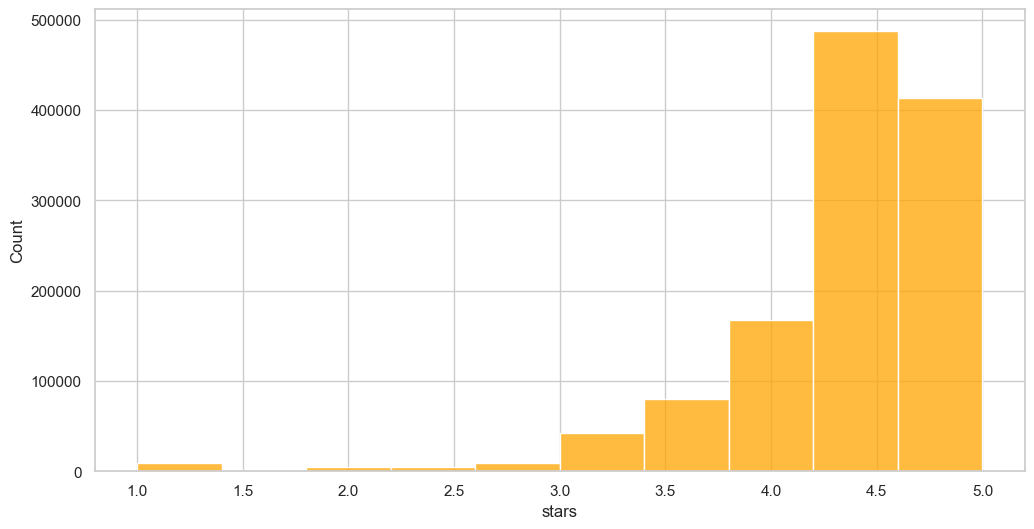

In [66]:
sns.histplot(ratings, bins=10, color="orange")